# RGCBasics: another moving bar
This introduction generates a moving bar stimulus using the 'ieStimulusBar' function, which takes care of the irksome part of building the dynamic scene and sensor/cone absorptions.

This notebook employs the "cascade" model of the RGC firing, where the cone absorptions are converted into an outer segment current, a bipolar mosaic representation and finally RGC firing. This is distinct from the conventional GLM for RGC firing because it forms reasonably accurate representations of the signal at intermediate steps.

In [1]:
% Set the parameters for the moving bar stimulus
params.barwidth = 5;
params.meanLuminance = 200;
params.row = 64; params.col = 64;

params.expTime = 0.001;
params.timeInterval = 0.001;
params.nSteps = 200;     % Number of stimulus frames

paramsStim.timeInterval = .001;
paramsStim.expTime      = .001;

iStim = ieStimulusBar(params);
sensor = iStim.absorptions;

Computing cone isomerizations:


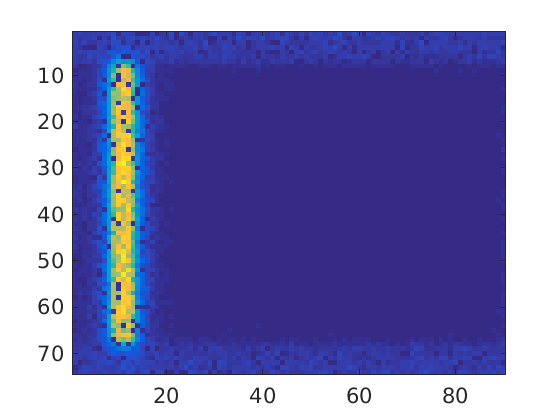

[Warning: MATLAB has disabled some advanced graphics rendering features by
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>.]


In [2]:
% Generate an image of one frame of the cone absorptions
photons = sensorGet(sensor,'photons');
imagesc(photons(:,:,10));

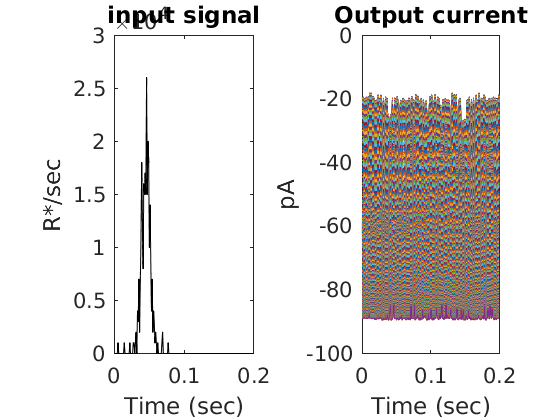

In [4]:
%% Outer segment calculation - biophysical model
% The iStim structure generates the movie, the scene, the oi and the
% cone absorptions. The next step is to get the outer segment current. The
% linear outer segment model is employed here.

% % Initialize
osB = osCreate('biophys');

% Set size of retinal patch based on absorptions sensor object
patchSize = sensorGet(sensor,'width','m');
osB = osSet(osB, 'patch size', patchSize);

% Set time step of simulation equal to absorptions sensor object
timeStep = sensorGet(sensor,'time interval','sec');
osB = osSet(osB, 'time step', timeStep);

% Set initial conditions on OS current based on mean cone absorption level
sensorVolts = sensorGet(sensor,'volts');
paramsOS.bgVolts = 1*mean(sensorVolts(:));

clear sensorVolts

% Compute the outer segment response to the absorptions with the linear
% model.
osB = osCompute(osB,sensor,paramsOS);

% % Plot the photocurrent for a number of cones.
osPlot(osB,sensor);

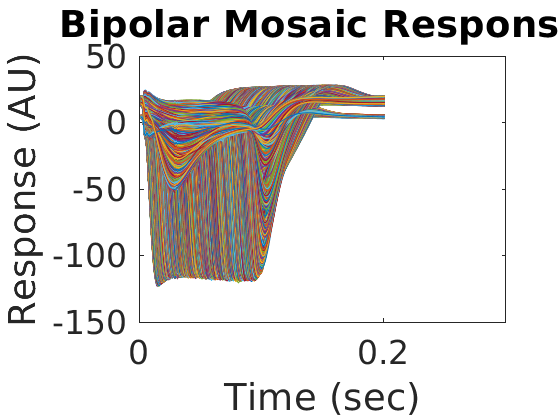

In [6]:
% Generate the bipolar cell representation
bp = bipolar(osB,'filterType',1);
% bp = bipolar(os,cellType,2);

bp = bipolarCompute(bp, osB);

bipolarPlot(bp,'response');

In [7]:
%% Build rgc

clear params
params.name      = 'Macaque inner retina 1'; % This instance

params.eyeSide   = 'left';   % Which eye
params.eyeRadius = 4;        % Radius in mm
params.eyeAngle  = 90;       % Polar angle in degrees

innerRetinaSU = irCreate(bp, params);

% innerRetinaSU.mosaicCreate('model','glm','type','off midget');
innerRetinaSU.mosaicCreate('model','glm','type','on midget');
% innerRetinaSU.mosaicCreate('model','glm','type','off parasol');
% innerRetinaSU.mosaicCreate('model','glm','type','on midget');

%% Compute RGC response
innerRetinaSU = irCompute(innerRetinaSU, bp);

Elapsed time is 0.791953 seconds.
     
Spatial Convolution, on midget:     
Elapsed time is 0.811536 seconds.
Temporal Convolution, on midget:     
Elapsed time is 0.924484 seconds.

itrial =

     1


itrial =

     2


itrial =

     3


itrial =

     4


itrial =

     5


itrial =

     6


itrial =

     7


itrial =

     8


itrial =

     9


itrial =

    10


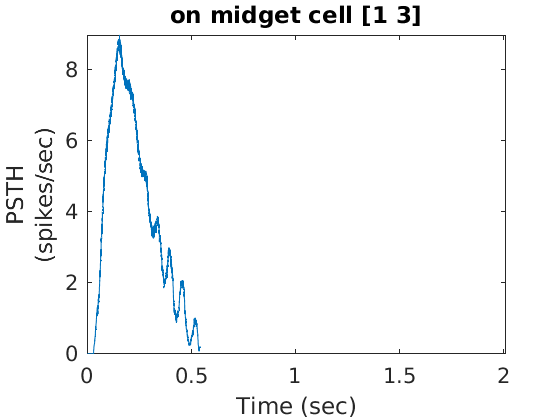

In [8]:
% Plot RGC firing from a cell on the left; this should happen near t = 0
irPlot(innerRetinaSU, 'psth','type',1,'cell',[1 3]);

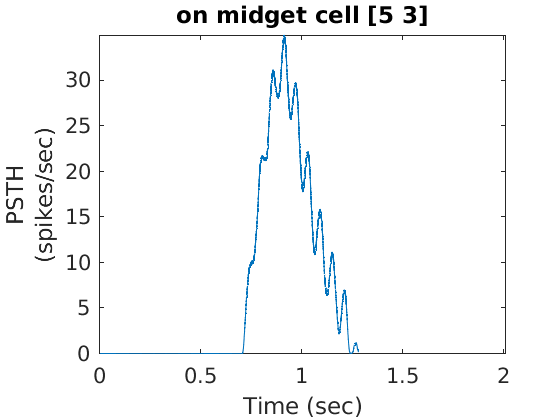

In [12]:
% Plot RGC firing for a cell on the right; this should happen later than t = 0
irPlot(innerRetinaSU, 'psth','type',1,'cell',[5 3]);